In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para mejorar el contraste y realizar la segmentación
def process_image(image_path, pixel_to_km_factor):
    # Cargar la imagen
    imagen = cv2.imread(image_path, cv2.IMREAD_COLOR)
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 5, 1)
    plt.title('Imagen original')
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

    # Convertir la imagen a escala de grises
    bn_imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplica umbral para detectar las nubes y el texto
    mascara = bn_imagen > 160  

    # Aplica la máscara para excluir las nubes
    masked_image = np.copy(bn_imagen)
    masked_image[mascara] = 0
    plt.subplot(1, 5, 2)
    plt.title('Imagen con máscara')
    plt.imshow(masked_image, cmap='gray')

    # Segmentación por umbral usando el método de Otsu
    _, imagen_segmentada = cv2.threshold(masked_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.subplot(1, 5, 3)
    plt.title('Imagen segmentada')
    plt.imshow(imagen_segmentada, cmap='gray')

    # Operador morfológico para mejorar la segmentación
    kernel = np.ones((2,2),np.uint8)
    imagen_finalizada = cv2.morphologyEx(imagen_segmentada, cv2.MORPH_OPEN, kernel, iterations = 1)
    plt.subplot(1, 5, 4)
    plt.title('Imagen con apertura')
    plt.imshow(imagen_finalizada, cmap='gray')

    # Erosionar la imagen
    imagen_erosionada = cv2.erode(imagen_finalizada, kernel, iterations = 1)
    plt.subplot(1, 5, 5)
    plt.title('Imagen erosionada')
    plt.imshow(imagen_erosionada, cmap='gray')
    plt.show()


    # Calcular el área deforestada
    pixeles_area_deforestada = np.sum(imagen_erosionada == 255)
    area_deforestada_km2 = (pixeles_area_deforestada * pixel_to_km_factor**2)

    return imagen, imagen_erosionada, area_deforestada_km2

# Cargar las imágenes para procesar
image_paths = [
    'frame_001.jpg', # Imagen del año 2000
    'frame_005.jpg', # Imagen del año 2004
    'frame_009.jpg', # Imagen del año 2008
    'frame_013.jpg', # Imagen del año 2012
    'frame_017.jpg'  # Imagen del año 2016
]

pixel_to_km = 20 / 51


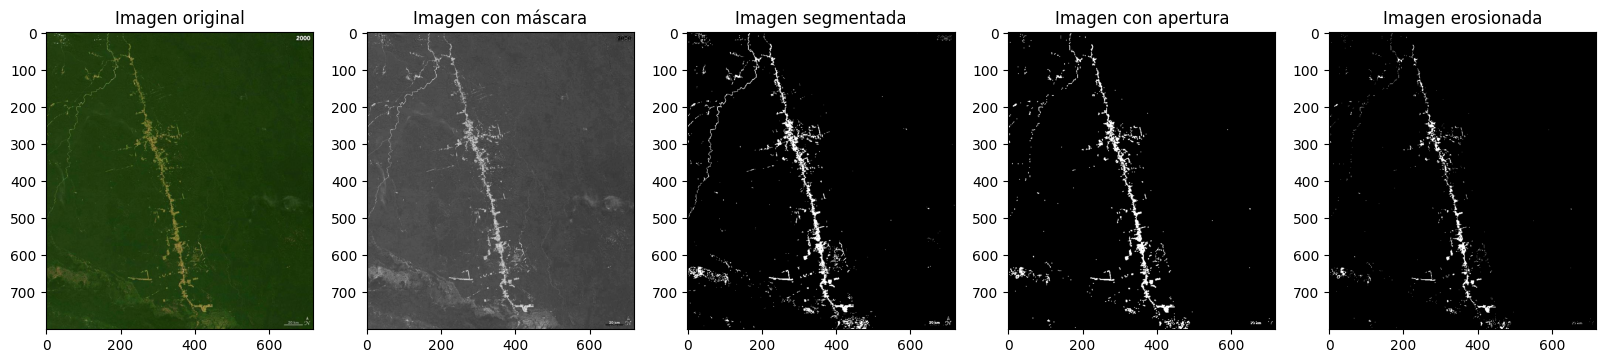

El área deforestada en el año 2000 es: 1171.86 km²


In [39]:
#Ejecutar imagen 1
imagen_original, imagen_limpia, area_km2 = process_image(image_paths[0], pixel_to_km)
print(f"El área deforestada en el año 2000 es: {area_km2:.2f} km²")

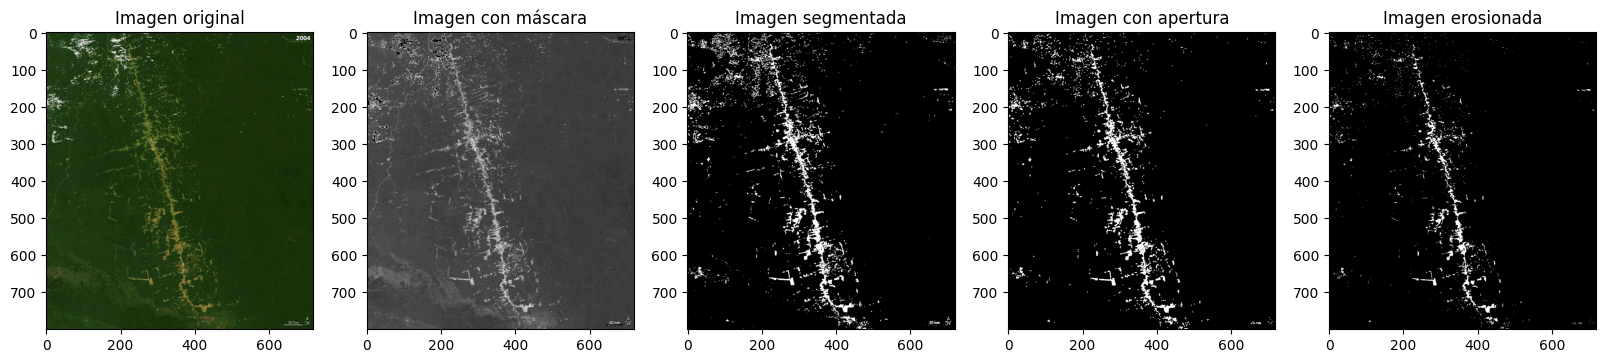

El área deforestada en el año 2004 es: 2017.53 km²


In [40]:
#Ejecutar imagen 2
imagen_original, imagen_limpia, area_km2 = process_image(image_paths[1], pixel_to_km)
print(f"El área deforestada en el año 2004 es: {area_km2:.2f} km²")


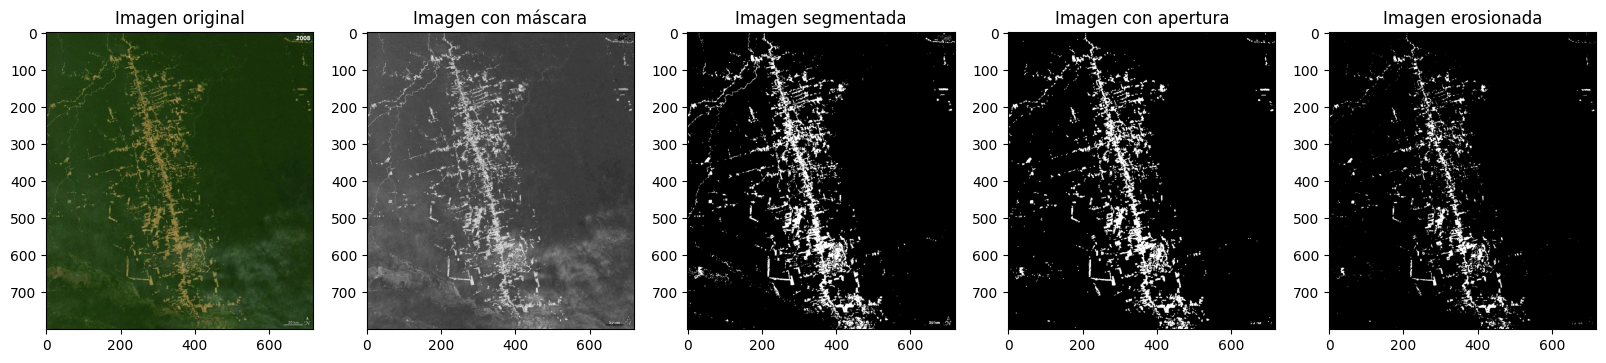

El área deforestada en el año 2008 es: 3499.88 km²


In [41]:
#Ejecutar imagen 3
imagen_original, imagen_limpia, area_km2 = process_image(image_paths[2], pixel_to_km)
print(f"El área deforestada en el año 2008 es: {area_km2:.2f} km²")


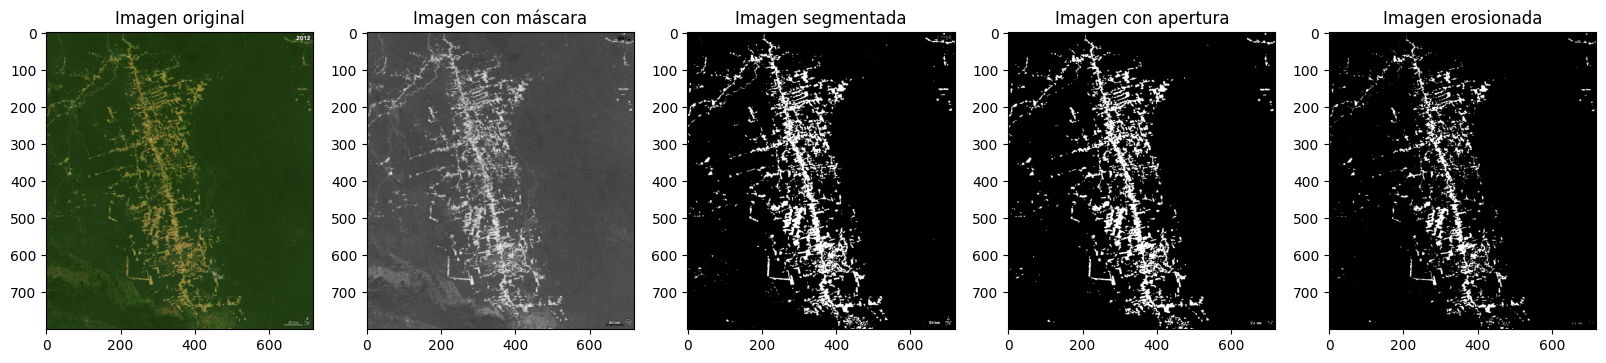

El área deforestada en el año 2012 es: 4589.47 km²


In [42]:
#Ejecutar imagen 4
imagen_original, imagen_limpia, area_km2 = process_image(image_paths[3], pixel_to_km)
print(f"El área deforestada en el año 2012 es: {area_km2:.2f} km²")

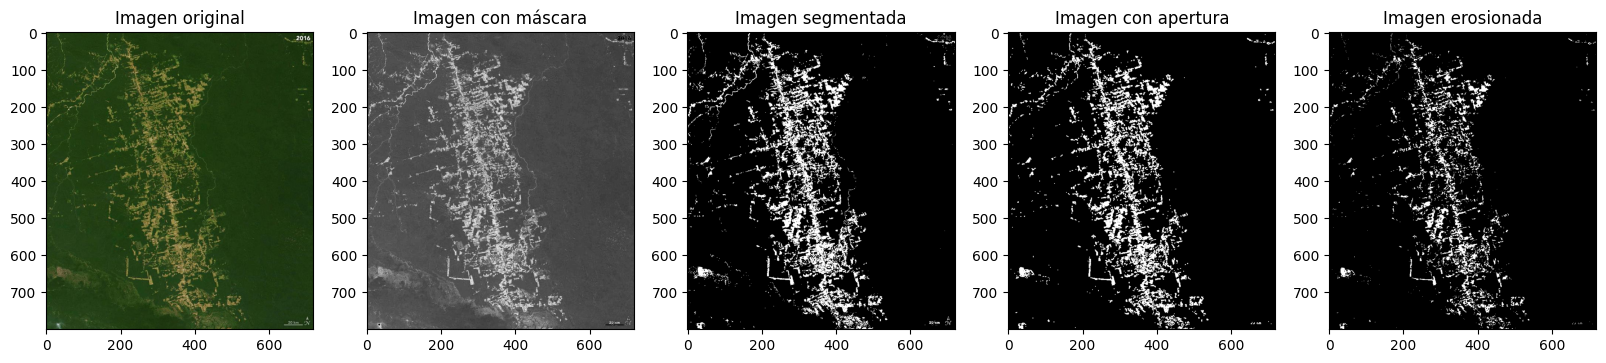

El área deforestada en el año 2016 es: 4840.91 km²


In [43]:
#Ejecutar imagen 5
imagen_original, imagen_limpia, area_km2 = process_image(image_paths[4], pixel_to_km)
print(f"El área deforestada en el año 2016 es: {area_km2:.2f} km²")